## 时间序列预测算法：ARMA

In [13]:
import pandas as pd
data = pd.read_csv('AirPassengers.csv',parse_dates=['Month'],index_col='Month')
#转换为时间序列数据
ts = data['#Passengers']
ts.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [15]:
ts.tail()
#逆向读出

Month
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, dtype: int64

In [16]:
type(ts)

pandas.core.series.Series

In [17]:
ts.shape

(144,)

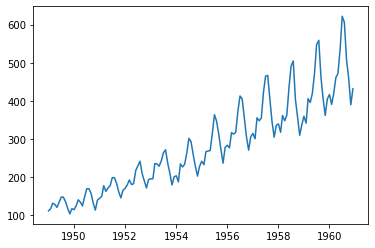

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(ts)

#### ADF检验
* 原假设：序列非平稳（具有单位根）。如果得出p值<显著性水平（一般为0.05），则拒绝原假设，说明序列平稳

In [19]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(ts)
dftest[1]

0.9918802434376409

In [20]:
ts_diff = ts.diff(1)
# 差分：后项减前项

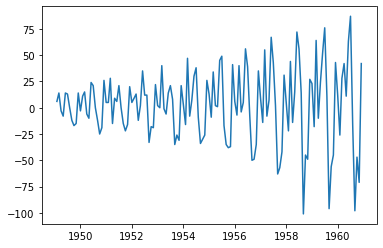

In [21]:
plt.plot(ts_diff)
ts_diff.dropna(inplace = True)
#由于差分之后第一位是空值，因此需要去掉

In [22]:
dftest_diff = adfuller(ts_diff)
dftest_diff[1]
#差分后再做一次平稳性检验，看序列是否平稳
#当显著性水平为90%，说明序列平稳

0.05421329028382711

In [25]:
import warnings
warnings.filterwarnings("ignore")
#不显示warning的提示

import statsmodels.api as sm
#max_ar: p的最大值。max_ma: q的最大值，ic=["aic"] 使用aic定阶
res = sm.tsa.arma_order_select_ic(ts_diff,max_ar = 5,max_ma = 5,ic = ['aic'])
res.aic_min_order

(4, 5)

In [26]:
p = res.aic_min_order[0]
q= res.aic_min_order[1]

In [31]:
from statsmodels.tsa.arima_model import ARIMA

#第一种，使用原数据，在模型中d参数设置为1阶差分
model1 = ARIMA(ts,order=(p,1,q))
res.arima1 = model1.fit()

#第二种，使用差分后的数据
model2 = ARIMA(ts_diff,order=(p,0,q))
res_arima2 = model2.fit()

In [34]:
pre1 = res.arima1.predict(start = str('1960-01'),end=str('1960-12'),dynamic=False)
print(pre1.head())

1960-01-01    29.547528
1960-02-01   -19.741150
1960-03-01    25.436133
1960-04-01    21.529440
1960-05-01    25.573942
Freq: MS, dtype: float64


In [37]:
pre2 = res_arima2.predict(start = str('1960-01'),end=str('1960-12'),dynamic=False)
print(pre2.head())

1960-01-01    29.547528
1960-02-01   -19.741150
1960-03-01    25.436133
1960-04-01    21.529440
1960-05-01    25.573942
Freq: MS, dtype: float64


In [38]:
pre1

1960-01-01    29.547528
1960-02-01   -19.741150
1960-03-01    25.436133
1960-04-01    21.529440
1960-05-01    25.573942
1960-06-01    11.497833
1960-07-01     4.011845
1960-08-01   -20.595638
1960-09-01   -45.953467
1960-10-01   -91.985057
1960-11-01   -39.577374
1960-12-01    33.213363
Freq: MS, dtype: float64

In [40]:
pre1.iloc[0] = pre1.iloc[0]+data.loc['1959-12','#Passengers'][0]
pre1

1960-01-01    434.547528
1960-02-01    -19.741150
1960-03-01     25.436133
1960-04-01     21.529440
1960-05-01     25.573942
1960-06-01     11.497833
1960-07-01      4.011845
1960-08-01    -20.595638
1960-09-01    -45.953467
1960-10-01    -91.985057
1960-11-01    -39.577374
1960-12-01     33.213363
Freq: MS, dtype: float64

In [41]:
pre_cumsum1 = pre1.cumsum()
#累计求和，比如：[1,2,3,4,5]->[1,3,6,10,15]
pre_cumsum1

1960-01-01    434.547528
1960-02-01    414.806378
1960-03-01    440.242511
1960-04-01    461.771951
1960-05-01    487.345892
1960-06-01    498.843726
1960-07-01    502.855571
1960-08-01    482.259932
1960-09-01    436.306466
1960-10-01    344.321408
1960-11-01    304.744035
1960-12-01    337.957398
Freq: MS, dtype: float64

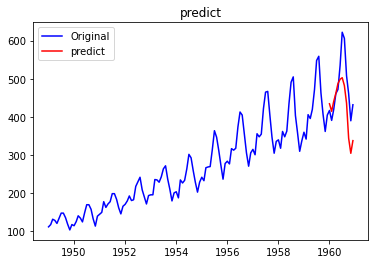

In [42]:
plt.plot(ts,color='blue',label='Original')
mean = plt.plot(pre_cumsum1,color='red',label='predict')
plt.legend(loc='best')
#设置图例显示的位置为自适应
plt.title('predict')
plt.show(block=False)
#block=False,matplotlib绘图显示同时运行下面的代码

* 预测数据是红线，原始数据是蓝线